# Detecting Diabetes

Content
 1. [Problem](#section1)
   <a href="#section1"></a>
 2. [Solution](#section10)
   <a href="#section10"></a>  
 3. [Obtaining Data ](#section2)
   <a href="#section2"></a>
 4. [Feature Engineering ](#section3)
   <a href="#section3"></a>    
 5. [Exploratory Data Analysis (EDA)](#section5)
   <a href="#section5"></a>     
 6. [Correlation](#section6)
   <a href="#section6"></a>   
   * [Correlation Table ](#section61)
     <a href="#section61"></a>
   * [Heatmaps ](#section62)
     <a href="#section62"></a>  
 7. [Model Development](#section7)
   <a href="#section7"></a>
 8. [Model Evaluation](#section8)
   <a href="#section8"></a>
   * [Confusion Matrix](#section81)
     <a href="#section81"></a> 
   * [Classification Report ](#section82)
     <a href="#section82"></a>
   * [ROC-curve ](#section83)
     <a href="#section83"></a>    
 

<a id="section1"></a>

## 1. Problem

Diabetes is a chronic disease which is more common among the people of all age groups. Predicting this disease at an early stage can help people necessary precautions and change his/her lifestyle accordingly to either prevent its occurrence or control the disease.

<a id="section10"></a>
## 2. Solution

The following steps are taken in order to detect if a particular person has diabetes or not.

* Signs displayed by diabetes patients in its early stages should be researched by asking medical professionals and students about it.
* A survey should be conducted related to the signs after research; here the questions were taken from a diabetes risk questionnaire by the [Patient](https://patient.info/news-and-features/quiz-do-i-have-diabetes) .
* After collecting the responses and cleaning the data, a predictive model is made by using the dataset.


<a id="section2"></a>
## 3. Obtaining Data 

In [1]:
import pandas as pd
df=pd.read_csv("Exposys Project Survey Data.csv", engine="python")
df.shape

(58, 18)

In [2]:
df.head()

,S.no.,Timestamp,Health,Gender,Age,Active,Diabetes,Diabetes_in_family,Obese,Abnormal_thirst,Abnormal_urination,Slow_wound_healing,Abnormal_hunger,Vision,Involuntarily_shaking_legs,Fatigue,Dizziness,Smoking
0,1,4/23/2020 16:02:22,Good,Female,35,2,No,Yes,No,Yes,"No, I don't think so.","Yes, they seem to be taking longer.",No,"Yes, I sometimes see ""floaters"""" in my line of...","Yes,once or twice","No, i feel the same as always.",Never,No
1,2,4/23/2020 16:36:05,Good,Male,67,0,No,No,"Yes, I'm overweight or obese.",No,"No, I don't think so.","Yes, they seem to be taking longer.",No,"Yes,sometimes my eyesight seems a little blurry","Yes,once or twice","Yes, I'm exhausted",Never,No
2,3,4/23/2020 16:36:05,Good,Female,26,1,No,Yes,No,Yes,"No, I don't think so.","No, they are healing just fine.",No,"Yes,sometimes my eyesight seems a little blurry",No,"No, i feel the same as always.",Never,No
3,4,4/23/2020 16:37:13,Good,Male,51,3 or more,No,Yes,No,No,"No, I don't think so.","No, they are healing just fine.",No,"No,my eyes are fine",No,"No, i feel the same as always.",Never,Yes
4,5,4/23/2020 16:55:02,Very good,Female,51,3 or more,No,Yes,"Yes, I'm overweight or obese.",No,"No, I don't think so.","No, they are healing just fine.",No,"No,my eyes are fine",No,"No, i feel the same as always.",Never,No


In [3]:
df.dtypes

S.no.                          int64
Timestamp                     object
Health                        object
Gender                        object
Age                            int64
Active                        object
Diabetes                      object
Diabetes_in_family            object
Obese                         object
Abnormal_thirst               object
Abnormal_urination            object
Slow_wound_healing            object
Abnormal_hunger               object
Vision                        object
Involuntarily_shaking_legs    object
Fatigue                       object
Dizziness                     object
Smoking                       object
dtype: object

In [4]:
all=["int64","float","object"]

In [5]:
df.describe(include=all)

,S.no.,Timestamp,Health,Gender,Age,Active,Diabetes,Diabetes_in_family,Obese,Abnormal_thirst,Abnormal_urination,Slow_wound_healing,Abnormal_hunger,Vision,Involuntarily_shaking_legs,Fatigue,Dizziness,Smoking
count,58.000000,58,58,58,58.000000,58,58,58,58,58,58,58,58,58,58,58,58,58
unique,NaN,57,5,2,NaN,4,2,2,2,2,2,2,2,4,3,3,3,2
top,NaN,4/23/2020 16:36:05,Very good,Female,NaN,3 or more,No,Yes,No,No,"No, I don't think so.","No, they are healing just fine.",No,"No,my eyes are fine",No,"No, i feel the same as always.",Never,No
freq,NaN,2,23,29,NaN,28,41,39,33,50,50,53,50,38,42,42,43,50
mean,29.500000,NaN,NaN,NaN,44.931034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,16.886879,NaN,NaN,NaN,9.998003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,15.250000,NaN,NaN,NaN,39.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,29.500000,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,43.750000,NaN,NaN,NaN,51.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id="section3"></a>
## 4. Feature Engineering

<a id="section31"></a>
###  &nbsp; 4.1. Diabetes survey data key
1.	Health

Health: "Poor":0, "Fair":1,"Good":2,"Very good":3,"Excellent":4

2.	Gender

Gender: "Male":2,"Female":1

3.	Active

Active: "0":0, "1":1, "2":2, "3 or more":3

4.	Diabetes

Diabetes: "Yes":1,"No":0


5.	Diabetes in family

Diabetes_in_family: "Yes":1,"No":0

6.	Obese

Obese: "Yes, I'm overweight or obese.": 1,"No":0

7.	Abnormal thirst

Abnormal_thirst: "Yes":1,"No":0

8.	Abnormal urination

Abnormal urination: "Yes, I seem to go a lot more often than everyone else.":1,"No, I don't think so.":0

9.	Slow wound healing

Slow wound healing: "Yes, they seem to be taking longer.":1,"No, they are healing just fine.":0

10.	Abnormal hunger
                          
Abnormal hunger: Yes":1,"No":0

11.	Vision

Vision: 
"Yes, I sometimes see "floaters"" in my line of vision":1
 "Yes,sometimes my eyesight seems a little blurry":0
 "No,my eyes are fine":1
 "Yes, I seem to have trouble with my focus sometimes":1


12.	Involuntarily shaking legs

Involuntarily_shaking_legs:
"Yes,once or twice":1,"No":0,"Yes,frequently":2


13.	Fatigue

Fatigue: 
"I''m a litle more tired than usual":1,"No, i feel the same as always.":0,"Yes, I'm exhausted":2

14.	Dizziness

Dizziness:
 "Never":0,"Yes,from time to time":1,"Yes,frequently":2

15.	Smoking

Smoking: "Yes":1,"No":0



### &nbsp; 4.1.1 Health

In [6]:
df["Health"].replace({"Poor":0, "Fair":1,"Good":2,"Very good":3,"Excellent":4},inplace=True)

### &nbsp; 4.1.2 Gender 

In [7]:
df["Gender"].replace({"Male":2,"Female":1},inplace=True)

### &nbsp; 4.1.3 Active

In [8]:
df["Active"].replace({"0":0, "1":1, "2":2, "3 or more":3},inplace=True)

### &nbsp; 4.1.4 Diabetes

In [9]:
df["Diabetes"].replace({"Yes":1,"No":0}, inplace=True)

### &nbsp; 4.1.5 Diabetes in family

In [10]:
df["Diabetes_in_family"].replace({"Yes":1,"No":0},inplace=True)

### &nbsp; 4.1.6. Obese

In [11]:
df["Obese"].replace({"Yes, I'm overweight or obese.": 1,"No":0}, inplace=True)

### &nbsp; 4.1.7 Abnormal thirst

In [12]:
df["Abnormal_thirst"].replace({"Yes":1,"No":0},inplace=True)

### &nbsp; 4.1.8 Abnormal urination

In [13]:
df["Abnormal_urination"].replace({"Yes, I seem to go a lot more often than everyone else.":1,"No, I don't think so.":0}, inplace=True)

### &nbsp; 4.1.9 Slow wound healing

In [14]:
df["Slow_wound_healing"].replace({"Yes, they seem to be taking longer.":1,"No, they are healing just fine.":0},inplace=True)

### &nbsp; 4.1.10 Abnormal hunger

In [15]:
df["Abnormal_hunger"].replace({"Yes":1,"No":0},inplace=True)

### &nbsp; 4.1.11 Vision

In [16]:
v=df["Vision"].unique().tolist()

In [17]:
v

['Yes, I sometimes see "floaters"" in my line of vision"',
 'Yes,sometimes my eyesight seems a little blurry',
 'No,my eyes are fine',
 'Yes, I seem to have trouble with my focus sometimes']

In [18]:
df["Vision"].replace({v[0]:1,v[1]:0,v[2]:1,v[3]:1},inplace=True)

### &nbsp; 4.1.12 Involuntarily shaking legs

In [19]:
df["Involuntarily_shaking_legs"].replace({"Yes,once or twice":1,"No":0,"Yes,frequently":2},inplace=True)

### &nbsp; 4.1.13 Fatigue

In [20]:
df["Fatigue"].replace({"I''m a litle more tired than usual":1,"No, i feel the same as always.":0,"Yes, I'm exhausted":2},inplace=True)

### &nbsp; 4.1.14 Dizziness

In [21]:
df["Dizziness"].replace({"Never":0,"Yes,from time to time":1,"Yes,frequently":2},inplace=True)

### &nbsp; 4.1.15 Smoking

In [22]:
df["Smoking"].replace({"Yes":1,"No":0},inplace=True)

In [23]:
df.head()

,S.no.,Timestamp,Health,Gender,Age,Active,Diabetes,Diabetes_in_family,Obese,Abnormal_thirst,Abnormal_urination,Slow_wound_healing,Abnormal_hunger,Vision,Involuntarily_shaking_legs,Fatigue,Dizziness,Smoking
0,1,4/23/2020 16:02:22,2,1,35,2,0,1,0,1,0,1,0,1,1,0,0,0
1,2,4/23/2020 16:36:05,2,2,67,0,0,0,1,0,0,1,0,0,1,2,0,0
2,3,4/23/2020 16:36:05,2,1,26,1,0,1,0,1,0,0,0,0,0,0,0,0
3,4,4/23/2020 16:37:13,2,2,51,3,0,1,0,0,0,0,0,1,0,0,0,1
4,5,4/23/2020 16:55:02,3,1,51,3,0,1,1,0,0,0,0,1,0,0,0,0


In [24]:
df.describe(include=all)

,S.no.,Timestamp,Health,Gender,Age,Active,Diabetes,Diabetes_in_family,Obese,Abnormal_thirst,Abnormal_urination,Slow_wound_healing,Abnormal_hunger,Vision,Involuntarily_shaking_legs,Fatigue,Dizziness,Smoking
count,58.000000,58,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
unique,NaN,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4/23/2020 16:36:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,29.500000,NaN,2.431034,1.500000,44.931034,1.982759,0.293103,0.672414,0.431034,0.137931,0.137931,0.086207,0.137931,0.741379,0.327586,0.327586,0.293103,0.137931
std,16.886879,NaN,0.957190,0.504367,9.998003,1.162142,0.459161,0.473432,0.499546,0.347839,0.347839,0.283121,0.347839,0.441701,0.573935,0.573935,0.530098,0.347839
min,1.000000,NaN,0.000000,1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.250000,NaN,2.000000,1.000000,39.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000
50%,29.500000,NaN,2.500000,1.500000,45.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,43.750000,NaN,3.000000,2.000000,51.750000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.750000,0.000000


In [25]:
df.dtypes

S.no.                          int64
Timestamp                     object
Health                         int64
Gender                         int64
Age                            int64
Active                         int64
Diabetes                       int64
Diabetes_in_family             int64
Obese                          int64
Abnormal_thirst                int64
Abnormal_urination             int64
Slow_wound_healing             int64
Abnormal_hunger                int64
Vision                         int64
Involuntarily_shaking_legs     int64
Fatigue                        int64
Dizziness                      int64
Smoking                        int64
dtype: object

<a id="section5"></a>
## 5. Exploratory Data Analysis (EDA)

Checking relation of feature variables with target variable,which is column "Diabetes"

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

<a id="section51"></a>
### &nbsp; 5.1. Relation between Gender and Diabetes

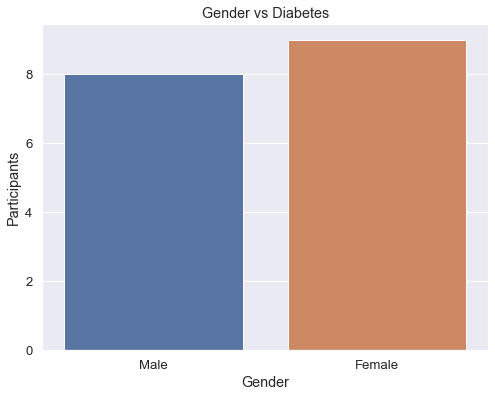

In [27]:
sns.set(font_scale=1.2)
fig,axs=plt.subplots(figsize=(8,6))
c1=sns.countplot(x="Gender",data=df[df["Diabetes"]==1],order=df["Gender"].value_counts().index,ax=axs)
c1.set_xticklabels(["Male","Female"])
c1.set(ylabel="Participants")
c1.set(xlabel="Gender")
c1.set_title("Gender vs Diabetes")
plt.show(c1)

There is no relation between Interest Correlation and Match.

<a id="section52"></a>
### &nbsp; 5.2. Relation between Diabetes in family and Diabetes

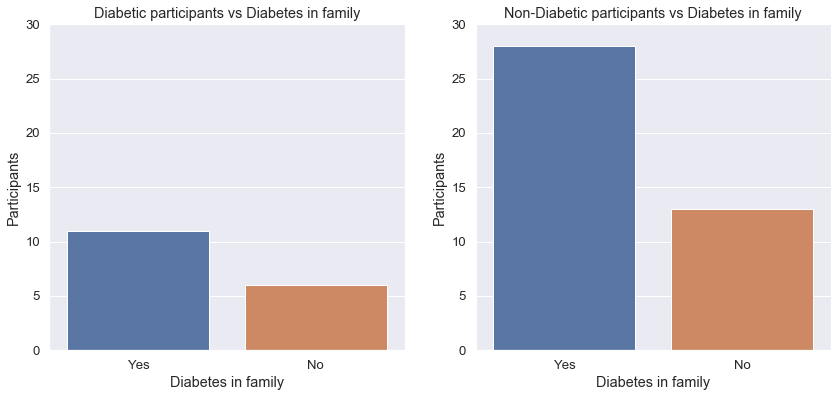

In [28]:
sns.set(font_scale=1.2)
fig,axs=plt.subplots(1,2,figsize=(14,6))
c1=sns.countplot(x="Diabetes_in_family",data=df[df["Diabetes"]==1],order=df["Diabetes_in_family"].value_counts().index,ax=axs[0])
c1.set_xticklabels(["Yes","No"])
c1.set(ylim=(0,30))
c1.set(ylabel="Participants")
c1.set(xlabel="Diabetes in family")
c1.set_title("Diabetic participants vs Diabetes in family")
c2=sns.countplot(x="Diabetes_in_family",data=df[df["Diabetes"]==0],order=df["Diabetes_in_family"].value_counts().index,ax=axs[1])
c2.set_xticklabels(["Yes","No"])
c2.set(ylim=(0,30))
c2.set(ylabel="Participants")
c2.set(xlabel="Diabetes in family")
c2.set_title("Non-Diabetic participants vs Diabetes in family")
plt.show(c1)
plt.show(c2)

This chart shows that people who have relatives diagnosed with diabetes aren't susceptible to being detected with it. 

<a id="section53"></a>
### 5.3. Relation between Health, Active and Diabetes

Text(0.5, 1.0, 'Non-Diabetic participants vs Active')

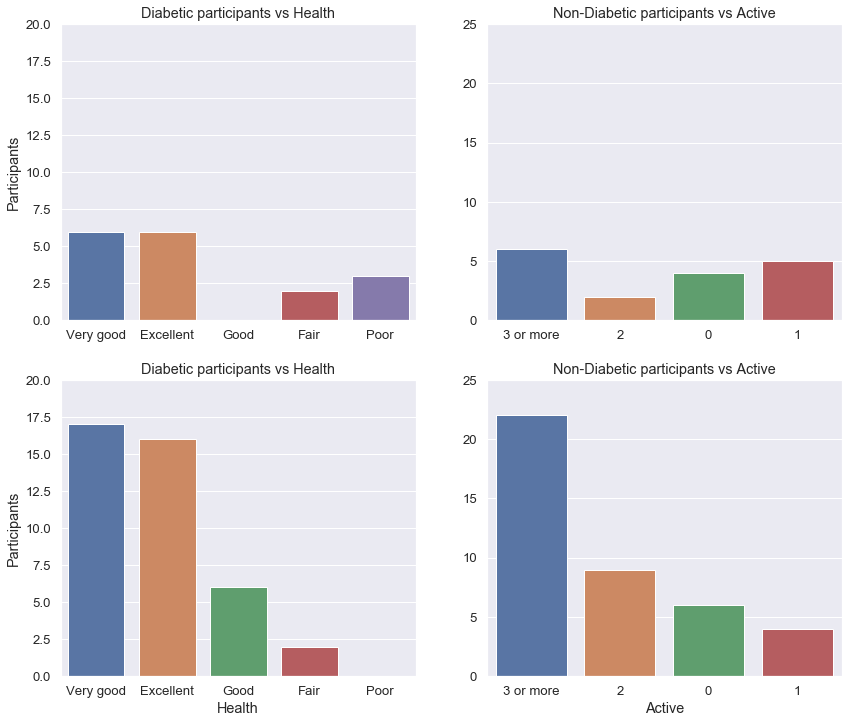

In [29]:

fig,axs=plt.subplots(2,2,figsize=(14,12))
c1=sns.countplot(x="Health",data=df[df["Diabetes"]==1],order=df["Health"].value_counts().index,ax=axs[0,0])
c1.set_xticklabels(["Very good","Excellent","Good","Fair","Poor"])
c1.set(ylim=(0,20))
c1.set(ylabel="Participants")
c1.set(xlabel=" ")
c1.set_title("Diabetic participants vs Health")
c2=sns.countplot(x="Active",data=df[df["Diabetes"]==1],order=df["Active"].value_counts().index,ax=axs[0,1])
c2.set(xlabel=" ")
c2.set_xticklabels(["3 or more","2","0","1"])
c2.set(ylim=(0,25))
c2.set(ylabel=" ")

c2.set_title("Non-Diabetic participants vs Active")
c1=sns.countplot(x="Health",data=df[df["Diabetes"]==0],order=df["Health"].value_counts().index,ax=axs[1,0])
c1.set_xticklabels(["Very good","Excellent","Good","Fair","Poor"])
c1.set(ylim=(0,20))
c1.set(ylabel="Participants")
c1.set(xlabel="Health")
c1.set_title("Diabetic participants vs Health")
c2=sns.countplot(x="Active",data=df[df["Diabetes"]==0],order=df["Active"].value_counts().index,ax=axs[1,1])
c2.set_xticklabels(["3 or more","2","0","1"])
c2.set(ylim=(0,25))
c2.set(ylabel=" ")
c2.set(xlabel="Active")
c2.set_title("Non-Diabetic participants vs Active")


This chart shows that people who feel unhealthy or/and aren't active are highly susceptible to being detected with diabetes.

<a id="section54"></a>
### 5.4. Relation between Obese, Abnormal hunger and Diabetes

Text(0.5, 1.0, 'Non-Diabetic participants vs Abnormal hunger')

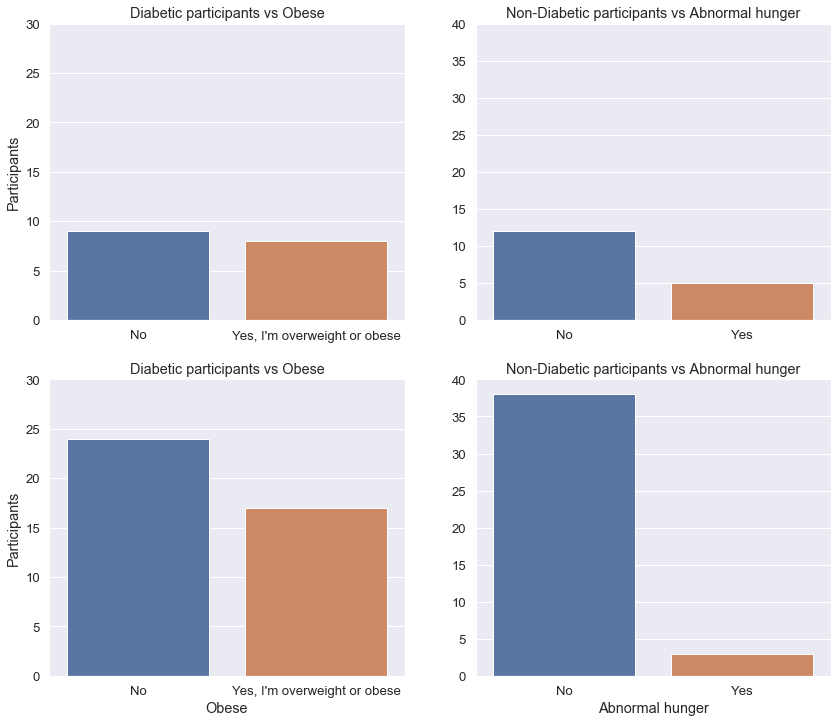

In [30]:

fig,axs=plt.subplots(2,2,figsize=(14,12))
c1=sns.countplot(x="Obese",data=df[df["Diabetes"]==1],order=df["Obese"].value_counts().index,ax=axs[0,0])
c1.set_xticklabels(["No","Yes, I'm overweight or obese"])
c1.set(ylim=(0,30))
c1.set(ylabel="Participants")
c1.set(xlabel=" ")
c1.set_title("Diabetic participants vs Obese")
c2=sns.countplot(x="Abnormal_hunger",data=df[df["Diabetes"]==1],order=df["Abnormal_hunger"].value_counts().index,ax=axs[0,1])
c2.set(xlabel=" ")
c2.set_xticklabels(["No","Yes"])
c2.set(ylim=(0,40))
c2.set(ylabel=" ")

c2.set_title("Non-Diabetic participants vs Abnormal hunger")
c1=sns.countplot(x="Obese",data=df[df["Diabetes"]==0],order=df["Obese"].value_counts().index,ax=axs[1,0])
c1.set_xticklabels(["No","Yes, I'm overweight or obese"])
c1.set(ylim=(0,30))
c1.set(ylabel="Participants")
c1.set(xlabel="Obese")
c1.set_title("Diabetic participants vs Obese")
c2=sns.countplot(x="Abnormal_hunger",data=df[df["Diabetes"]==0],order=df["Abnormal_hunger"].value_counts().index,ax=axs[1,1])
c2.set_xticklabels(["No","Yes"])
c2.set(ylim=(0,40))
c2.set(ylabel=" ")
c2.set(xlabel="Abnormal hunger")
c2.set_title("Non-Diabetic participants vs Abnormal hunger")

This chart shows that people who are obese or hungry, individually, aren't susceptible to being detected with diabetes.

<a id="section55"></a>
### &nbsp; 5.5. Relation between Age and Diabetes

Text(0.5, 1.0, 'Diabetes vs Age')

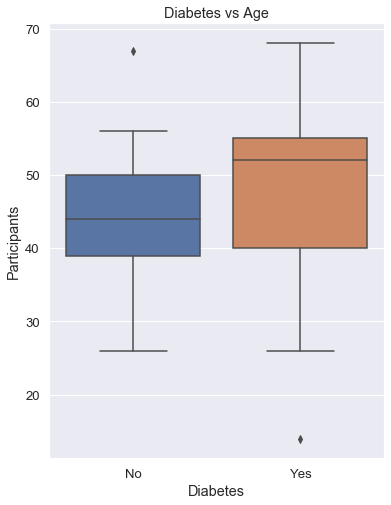

In [31]:
sns.set(font_scale=1.2)
fig,axs=plt.subplots(figsize=(6,8))
c1=sns.boxplot(data=df,x="Diabetes",y="Age",ax=axs)
c1.set_xticklabels(["No","Yes"])
c1.set(ylabel="Participants")
c1.set(xlabel="Diabetes")
c1.set_title("Diabetes vs Age")






Chances of getting a match increases when subject already has a repo with his/her partner.

<a id="section54"></a>
### 5.7. Relation between Abnormal thirst, Abnormal urination and Diabetes

Text(0.5, 1.0, 'Non-Diabetic participants vs Abnormal urination')

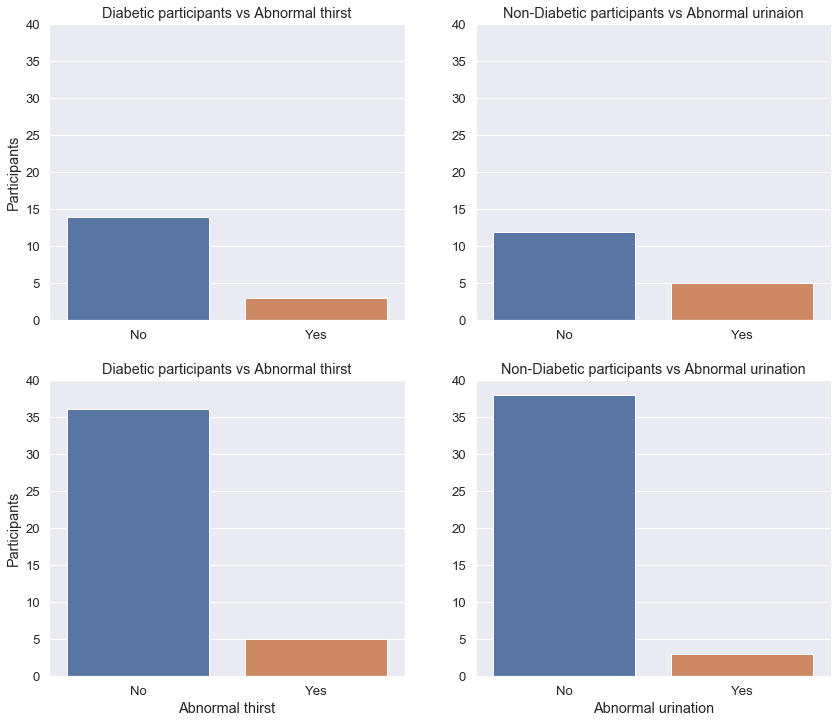

In [32]:

fig,axs=plt.subplots(2,2,figsize=(14,12))
c1=sns.countplot(x="Abnormal_thirst",data=df[df["Diabetes"]==1],order=df["Abnormal_thirst"].value_counts().index,ax=axs[0,0])
c1.set_xticklabels(["No","Yes"])
c1.set(ylim=(0,40))
c1.set(ylabel="Participants")
c1.set(xlabel=" ")
c1.set_title("Diabetic participants vs Abnormal thirst")
c2=sns.countplot(x="Abnormal_urination",data=df[df["Diabetes"]==1],order=df["Abnormal_urination"].value_counts().index,ax=axs[0,1])
c2.set(xlabel=" ")
c2.set_xticklabels(["No","Yes"])
c2.set(ylim=(0,40))
c2.set(ylabel=" ")

c2.set_title("Non-Diabetic participants vs Abnormal urinaion")
c1=sns.countplot(x="Abnormal_thirst",data=df[df["Diabetes"]==0],order=df["Abnormal_thirst"].value_counts().index,ax=axs[1,0])
c1.set_xticklabels(["No","Yes"])
c1.set(ylim=(0,40))
c1.set(ylabel="Participants")
c1.set(xlabel="Abnormal thirst")
c1.set_title("Diabetic participants vs Abnormal thirst")
c2=sns.countplot(x="Abnormal_urination",data=df[df["Diabetes"]==0],order=df["Abnormal_urination"].value_counts().index,ax=axs[1,1])
c2.set_xticklabels(["No","Yes"])
c2.set(ylim=(0,40))
c2.set(ylabel=" ")
c2.set(xlabel="Abnormal urination")
c2.set_title("Non-Diabetic participants vs Abnormal urination")

This chart shows that people who feel thirsty 24/7 or go to the bathroom alot, individually, aren't susceptible to being detected with diabetes.

<a id="section52"></a>
### &nbsp; 5.8. Relation between Slow wound healing and Diabetes

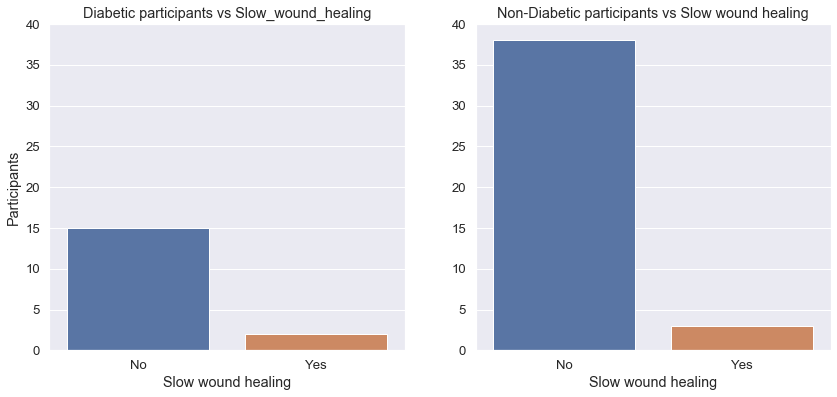

In [33]:
sns.set(font_scale=1.2)
fig,axs=plt.subplots(1,2,figsize=(14,6))
c1=sns.countplot(x="Slow_wound_healing",data=df[df["Diabetes"]==1],order=df["Slow_wound_healing"].value_counts().index,ax=axs[0])
c1.set_xticklabels(["No","Yes"])
c1.set(ylim=(0,40))
c1.set(ylabel="Participants")
c1.set(xlabel="Slow wound healing")
c1.set_title("Diabetic participants vs Slow_wound_healing")
c2=sns.countplot(x="Slow_wound_healing",data=df[df["Diabetes"]==0],order=df["Slow_wound_healing"].value_counts().index,ax=axs[1])
c2.set_xticklabels(["No","Yes"])
c2.set(ylim=(0,40))
c2.set(ylabel=" ")
c2.set(xlabel="Slow wound healing")
c2.set_title("Non-Diabetic participants vs Slow wound healing")
plt.show(c1)
plt.show(c2)

This chart shows that people who feel that their wounds take more time to heal than before aren't susceptible to be detected with diabetes.

<a id="section52"></a>
### &nbsp; 5.8. Relation between Vision and Diabetes

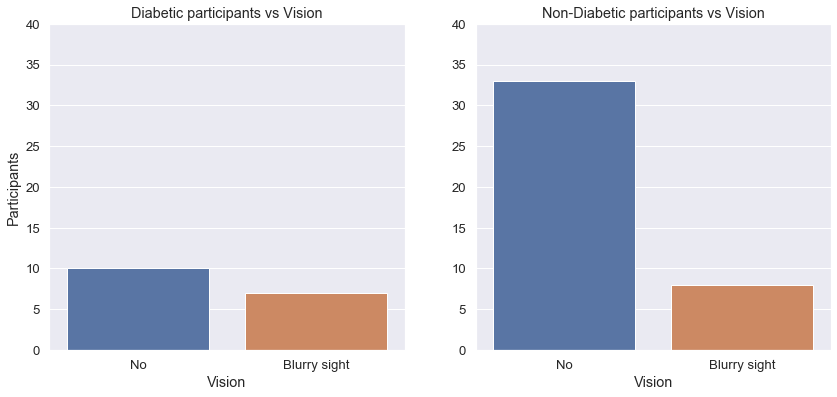

In [34]:
sns.set(font_scale=1.2)
fig,axs=plt.subplots(1,2,figsize=(14,6))
c1=sns.countplot(x="Vision",data=df[df["Diabetes"]==1],order=df["Vision"].value_counts().index,ax=axs[0])
c1.set_xticklabels(["No","Blurry sight"])
c1.set(ylim=(0,40))
c1.set(ylabel="Participants")
c1.set(xlabel="Vision")
c1.set_title("Diabetic participants vs Vision")
c2=sns.countplot(x="Vision",data=df[df["Diabetes"]==0],order=df["Vision"].value_counts().index,ax=axs[1])
c2.set_xticklabels(["No","Blurry sight"])
c2.set(ylim=(0,40))
c2.set(ylabel=" ")
c2.set(xlabel="Vision")
c2.set_title("Non-Diabetic participants vs Vision")
plt.show(c1)
plt.show(c2)

This chart shows that people with blurry eyesight are susceptible to be detected with diabetes, when compared to other vision related problems.

<a id="section54"></a>
### 5.9. Relation between Involuntarily shaking legs, Dizziness and Diabetes

Text(0.5, 1.0, 'Non-Diabetic participants vs Dizziness')

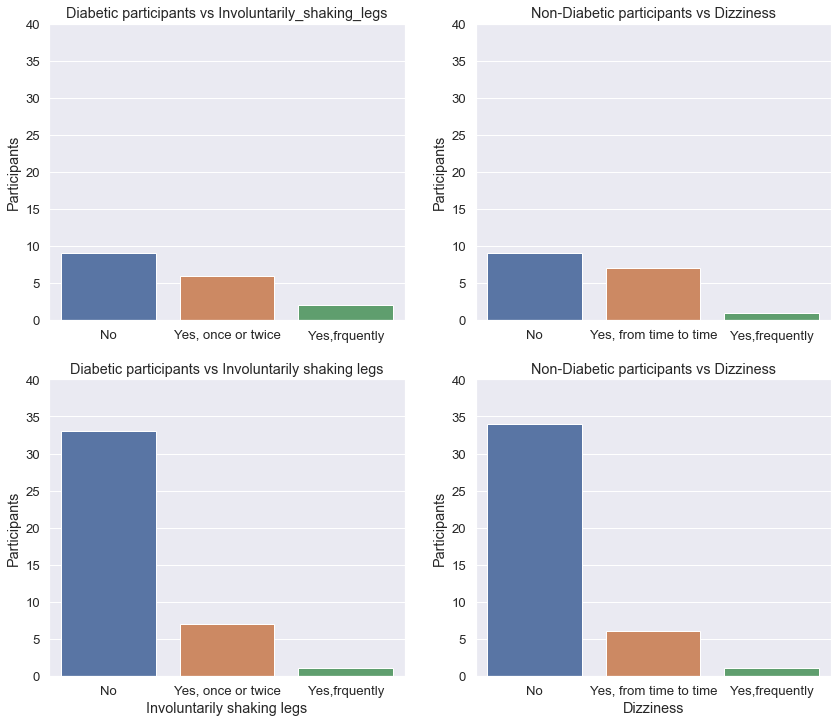

In [35]:

fig,axs=plt.subplots(2,2,figsize=(14,12))
c1=sns.countplot(x="Involuntarily_shaking_legs",data=df[df["Diabetes"]==1],order=df["Involuntarily_shaking_legs"].value_counts().index,ax=axs[0,0])
c1.set_xticklabels(["No","Yes, once or twice","Yes,frquently"])
c1.set(ylim=(0,40))
c1.set(ylabel="Participants")
c1.set(xlabel=" ")
c1.set_title("Diabetic participants vs Involuntarily_shaking_legs")
c2=sns.countplot(x="Dizziness",data=df[df["Diabetes"]==1],order=df["Dizziness"].value_counts().index,ax=axs[0,1])
c2.set(xlabel=" ")
c2.set_xticklabels(["No","Yes, from time to time","Yes,frequently"])
c2.set(ylim=(0,40))
c2.set(ylabel="Participants")

c2.set_title("Non-Diabetic participants vs Dizziness")
c1=sns.countplot(x="Involuntarily_shaking_legs",data=df[df["Diabetes"]==0],order=df["Involuntarily_shaking_legs"].value_counts().index,ax=axs[1,0])
c1.set_xticklabels(["No","Yes, once or twice","Yes,frquently"])
c1.set(ylim=(0,40))
c1.set(ylabel="Participants")
c1.set(xlabel="Involuntarily shaking legs")
c1.set_title("Diabetic participants vs Involuntarily shaking legs")
c2=sns.countplot(x="Dizziness",data=df[df["Diabetes"]==0],order=df["Dizziness"].value_counts().index,ax=axs[1,1])
c2.set_xticklabels(["No","Yes, from time to time","Yes,frequently"])
c2.set(ylim=(0,40))
c2.set(ylabel="Participants")
c2.set(xlabel="Dizziness")
c2.set_title("Non-Diabetic participants vs Dizziness")

This chart shows that people who shake legs involuntarily or/and feel like their head is spinning are susceptible to diabetes and have high chance of being diagnosed with it.

<a id="section54"></a>
### 5.10. Relation between Fatigue, Smoking and Diabetes

Text(0.5, 1.0, 'Non-Diabetic participants vs Smoking')

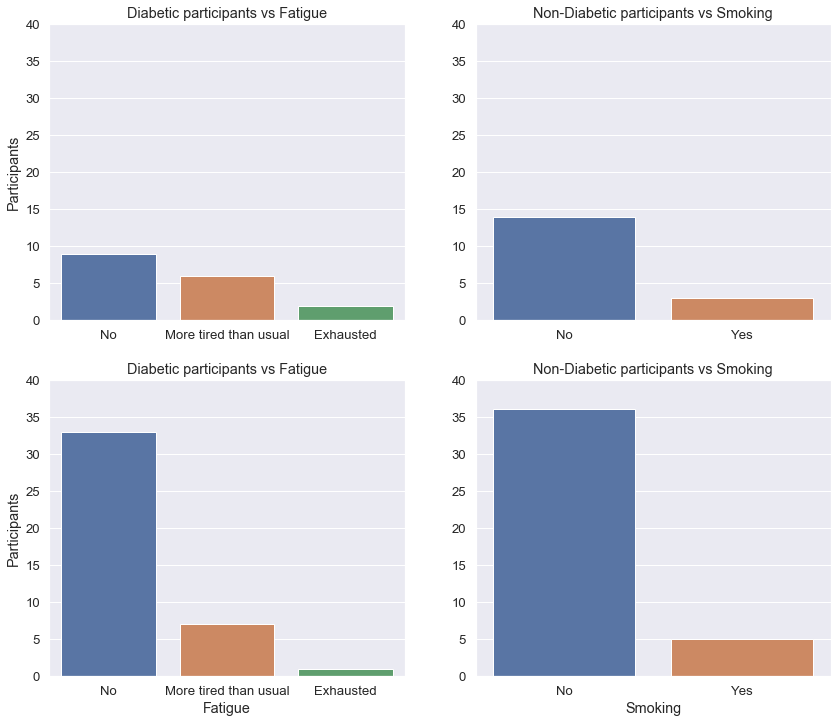

In [36]:

fig,axs=plt.subplots(2,2,figsize=(14,12))
c1=sns.countplot(x="Fatigue",data=df[df["Diabetes"]==1],order=df["Fatigue"].value_counts().index,ax=axs[0,0])
c1.set_xticklabels(["No","More tired than usual","Exhausted"])
c1.set(ylim=(0,40))
c1.set(ylabel="Participants")
c1.set(xlabel=" ")
c1.set_title("Diabetic participants vs Fatigue")
c2=sns.countplot(x="Smoking",data=df[df["Diabetes"]==1],order=df["Smoking"].value_counts().index,ax=axs[0,1])
c2.set(xlabel=" ")
c2.set_xticklabels(["No","Yes"])
c2.set(ylim=(0,40))
c2.set(ylabel=" ")
c2.set_title("Non-Diabetic participants vs Smoking")

c1=sns.countplot(x="Fatigue",data=df[df["Diabetes"]==0],order=df["Fatigue"].value_counts().index,ax=axs[1,0])
c1.set_xticklabels(["No","More tired than usual","Exhausted"])
c1.set(ylim=(0,40))
c1.set(ylabel="Participants")
c1.set(xlabel="Fatigue")
c1.set_title("Diabetic participants vs Fatigue")
c2=sns.countplot(x="Smoking",data=df[df["Diabetes"]==0],order=df["Smoking"].value_counts().index,ax=axs[1,1])
c2.set_xticklabels(["No","Yes"])
c2.set(ylim=(0,40))
c2.set(ylabel=" ")
c2.set(xlabel="Smoking")
c2.set_title("Non-Diabetic participants vs Smoking")

This chart shows that People with fatigue are more susceptible to diabetes than those who aren't. It also shows irrelevance of smoking feature in detecting diabetes as most of the diabetic participants do not smoke.

<a id="section6"></a>
##  6. Correlation

<a id="section61"></a>
### &nbsp; 6.1. Correlation Table

In [37]:
df.corr()

,S.no.,Health,Gender,Age,Active,Diabetes,Diabetes_in_family,Obese,Abnormal_thirst,Abnormal_urination,Slow_wound_healing,Abnormal_hunger,Vision,Involuntarily_shaking_legs,Fatigue,Dizziness,Smoking
S.no.,1.000000,0.136214,1.678753e-01,-0.039382,0.214103,0.225130,-0.145928,0.077989,-0.170244,2.747799e-01,-0.155953,0.173231,0.147003,-0.020817,-0.004525,-0.020578,-0.164271
Health,0.136214,1.000000,3.815660e-01,-0.000506,0.306453,-0.372333,-0.186228,-0.138538,-0.023621,-2.362075e-02,-0.268995,-0.181698,0.268288,-0.165731,-0.676688,-0.495386,0.081764
Gender,0.167875,0.381566,1.000000e+00,0.281806,-0.044896,-0.037878,-0.330623,-0.034816,-0.200000,-4.440892e-17,-0.061430,-0.100000,0.118125,-0.212121,-0.212121,-0.295280,0.400000
Age,-0.039382,-0.000506,2.818060e-01,1.000000,-0.196393,0.130594,-0.156820,0.223841,-0.375567,-7.306083e-03,-0.264370,-0.446193,0.273978,0.117129,-0.084658,-0.052393,0.199526
Active,0.214103,0.306453,-4.489630e-02,-0.196393,1.000000,-0.220507,0.085214,-0.228732,-0.124213,5.986173e-03,0.004597,0.049386,0.401288,-0.096595,-0.333321,-0.105565,0.049386
Diabetes,0.225130,-0.372333,-3.787770e-02,0.130594,-0.220507,1.000000,-0.034787,0.051431,0.071968,2.916583e-01,0.072131,0.291658,-0.225206,0.294987,0.294987,0.289555,0.071968
Diabetes_in_family,-0.145928,-0.186228,-3.306233e-01,-0.156820,0.085214,-0.034787,1.000000,0.014069,0.172659,-4.040951e-02,-0.047390,0.172659,-0.160559,-0.114661,0.014472,0.039774,0.066125
Obese,0.077989,-0.138538,-3.481553e-02,0.223841,-0.228732,0.051431,0.014069,1.000000,-0.247190,5.570485e-02,-0.019248,0.156670,-0.042497,0.110777,0.110777,-0.021703,-0.045260
Abnormal_thirst,-0.170244,-0.023621,-2.000000e-01,-0.375567,-0.124213,0.071968,0.172659,-0.247190,1.000000,1.300000e-01,0.055287,0.130000,-0.220500,-0.054545,-0.054545,-0.127955,-0.015000
Abnormal_urination,0.274780,-0.023621,-4.440892e-17,-0.007306,0.005986,0.291658,-0.040410,0.055705,0.130000,1.000000e+00,-0.122859,0.275000,-0.106312,0.384848,0.121212,0.062337,-0.015000


<a id="section62"></a>
### &nbsp; 6.2. Plotting a Heatmap to visualize correlation


(17.0, 0.0)

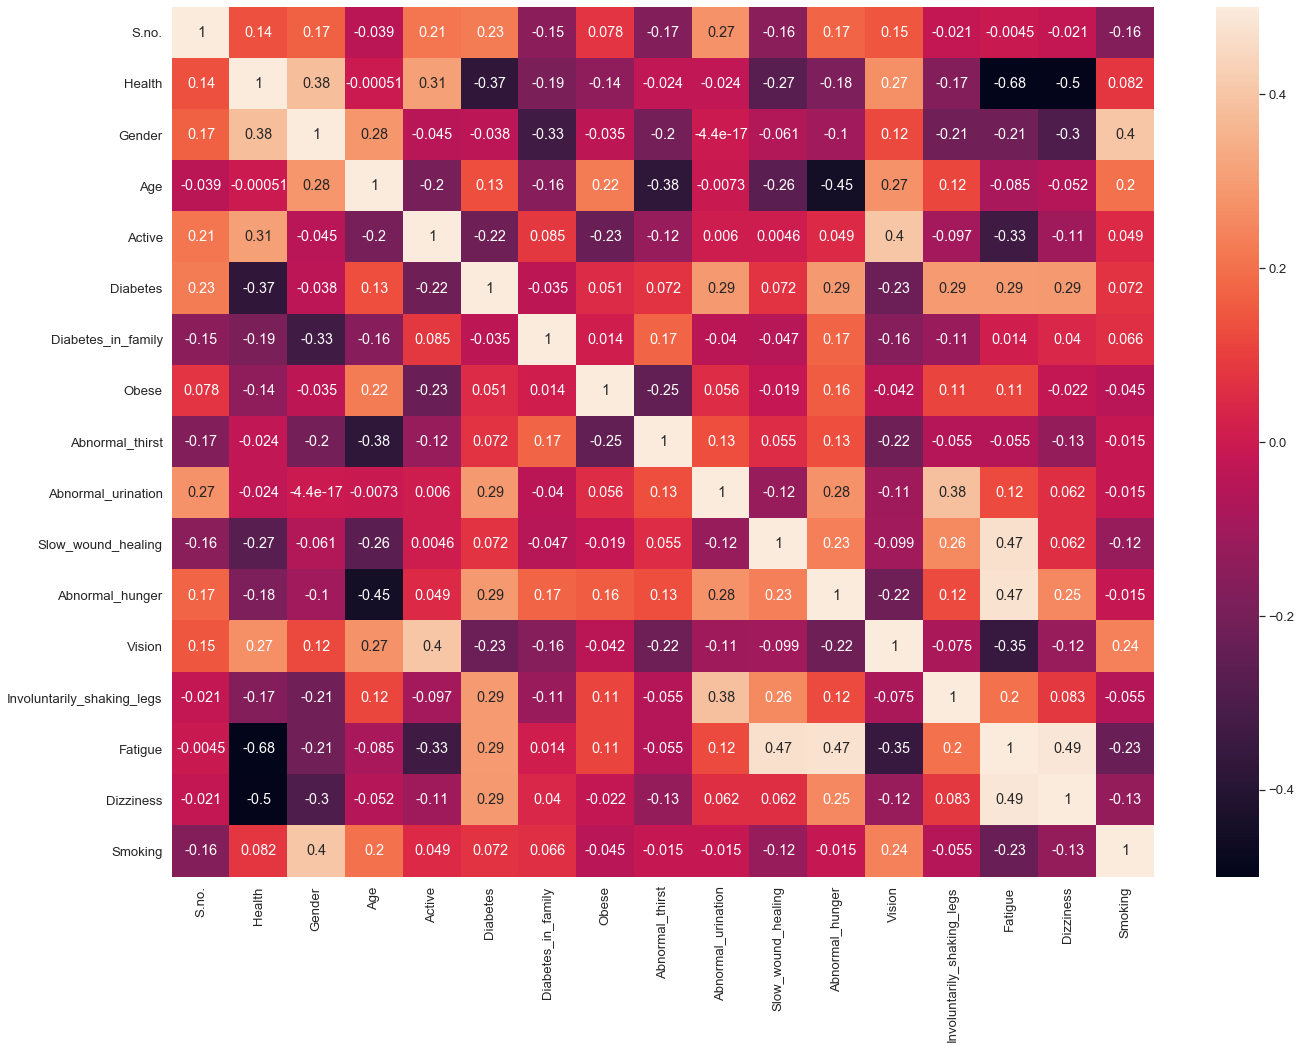

In [38]:
fig,ax=plt.subplots(figsize=(22,16))
heat=sns.heatmap(df.corr(),vmax=0.5,vmin=-0.5,annot=True,ax=ax)

bottom,top=heat.get_ylim()
heat.set_ylim(bottom+0.5,top-0.5)

<a id="section7"></a>

## 7. Model Development using Pipeline


In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split
import numpy as np

<a id="section71"></a>
###  &nbsp; 7.1. Feature Selection





After referring the above heatmaps, following features are to be selected for the model.
* Health
* Active
* Age
* Vision
* Abnormal_hunger
* Abnormal_urination
* Involuntarily_shaking_legs
* Fatigue
* Dizziness


In [40]:
features=["Health",
          "Active",
          "Age",
          "Vision",
          "Abnormal_hunger",
          "Abnormal_urination",
          "Involuntarily_shaking_legs",
          "Fatigue",
          "Dizziness"]

In [41]:
X=df[features]
y=df["Diabetes"]

<a id="section72"></a>
###  &nbsp; 7.2. k-fold Cross-Validation


In [42]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.22, shuffle=True)

In [43]:
RF_pipeline = make_pipeline(MinMaxScaler(),RandomForestClassifier())
RF_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [44]:
DT_pipeline = make_pipeline(MinMaxScaler(),DecisionTreeClassifier())
DT_pipeline.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False)

In [45]:
NB_pipeline = make_pipeline(MinMaxScaler(),GaussianNB())
NB_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

In [46]:
RF_scores = cross_val_score(RF_pipeline, X_train, y_train,cv=5, scoring='accuracy')
print("Accuracies: ",RF_scores)
print("Mean Accuracy: ", RF_scores.mean())

Accuracies:  [0.77777778 0.55555556 0.66666667 0.77777778 0.66666667]
Mean Accuracy:  0.6888888888888889


In [47]:
DT_scores = cross_val_score(DT_pipeline, X_train, y_train,cv=5, scoring='accuracy')
print("Accuracies: ",DT_scores)
print("Mean Accuracy: ", DT_scores.mean())

Accuracies:  [0.66666667 0.55555556 0.55555556 0.55555556 0.44444444]
Mean Accuracy:  0.5555555555555556


In [48]:
NB_scores = cross_val_score(NB_pipeline, X_train, y_train,cv=5, scoring='accuracy')
print("Accuracies: ",NB_scores)
print("Mean Accuracy: ", NB_scores.mean())

Accuracies:  [0.77777778 0.77777778 0.55555556 0.66666667 0.66666667]
Mean Accuracy:  0.6888888888888889


In [49]:
RF=RF_scores.mean()
DT=DT_scores.mean()
NB=NB_scores.mean()
d = {'Classifier': ["Random Forest","Decision Tree","Naive Bayes"], 'Mean Accuracy': [RF,DT,NB]}
model=pd.DataFrame(data=d)
model

,Classifier,Mean Accuracy
0,Random Forest,0.688889
1,Decision Tree,0.555556
2,Naive Bayes,0.688889


According to above table, Naive Bayes trumps others to be the best classifier as it has the best mean accuracy of the lot.

<a id="section8"></a>
## 8. Model Evaluation

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

In [51]:
NB_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

In [52]:
NB_predictions=NB_pipeline.predict(X_test)

In [53]:
print("Model Accuracy:",accuracy_score(y_test, NB_predictions)*100)

Model Accuracy: 84.61538461538461


<a id="section81"></a>
###  &nbsp; 8.1. Confusion Matrix


In [54]:
import numpy as np
cm = pd.DataFrame(confusion_matrix(y_test, NB_predictions))
cm['Total'] = np.sum(cm, axis=1)
cm = cm.append(np.sum(cm, axis=0), ignore_index=True)
cm.columns = ['Predicted No', 'Predicted Yes', 'Total']
cm = cm.set_index([['Actual No', 'Actual Yes', 'Total']])
print(cm)

            Predicted No  Predicted Yes  Total
Actual No              7              1      8
Actual Yes             1              4      5
Total                  8              5     13


<a id="section82"></a>
###  &nbsp; 8.2. Classification Report


In [55]:
print(classification_report(y_test, NB_predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.80      0.80      0.80         5

    accuracy                           0.85        13
   macro avg       0.84      0.84      0.84        13
weighted avg       0.85      0.85      0.85        13



<a id="section83"></a>
###  &nbsp; 8.3. ROC-curve


In [56]:
logit_roc_auc = roc_auc_score(y_test, NB_predictions) 

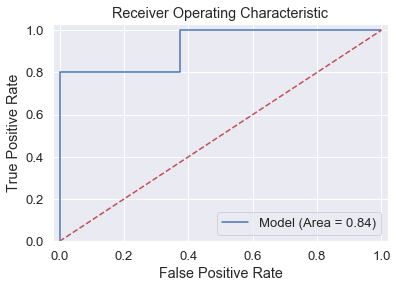

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, NB_pipeline.predict_proba(X_test)[:,1]) 
plt.figure()
plt.plot(fpr, tpr, label='Model (Area = %0.2f)' % logit_roc_auc) 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.02])
plt.ylim([0.0, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()